In [1]:
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
data = np.loadtxt("/Users/wangfei/Documents/Courses/CS/CS412/HW/HW1/data.csv")
np.random.seed(100)
np.random.shuffle(data)
features = []
digits = []
for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:])
        digits.append(str(row[0]))
numTrain = int(len(features)*0.2)
trainFeatures = features[:numTrain]
testFeatures = features[numTrain:]
trainDigits = digits[:numTrain]
testDigits = digits[numTrain:]

In [3]:
#polynomial kernel with degree 3
kPCA = KernelPCA(n_components=2, kernel='poly', degree = 3)
kPCA_transform = kPCA.fit_transform(trainFeatures)
#trainFeatures_transformed.shape   (312, 2)

## 1 Feature Extraction  
Python package "sklearn" was used. Figure 2.1 shows the two features extracted by Kernel PCA with polynomail kernel with degree 3. 

**a) Compare kernel PCA features with the features you selected from HW1. Do these features seem to better separate the data?**  
Yes. The features extracted by kernel PCA seems to be separating the data better. The features I used for HW1 are mean intensity and intensity standard deviation. Although these two features separate data pretty well, the gap between two groups are pretty narrow. But in this kPCA case, the two groups are widely separated and are thus better (see Figure 2.1). 

**b) Give the explained variance ratio for each of the two feature extractions given above. Is there one of the methods which explains more variance than the other? Is this what you expect? Explain your answer.**  


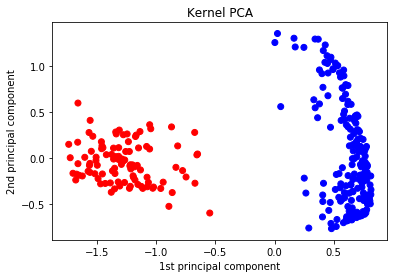

In [4]:
##Figure 2.1
mp.figure()
mp.title("Kernel PCA")
colors = []
for index in range(len(trainFeatures)):
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
mp.scatter(kPCA_transform[:,0], kPCA_transform[:,1],c=colors)
mp.xlabel("1st principal component")
mp.ylabel("2nd principal component")

mp.savefig('Figure2_1.png', dpi = 300)
show() 
##############################################################################
explained_variance = np.var(kPCA_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)


## 2 Logistic Regression  
Two features used in HW1 are mean intensity and intensity standard deviation. The parameter C in logistic regression model is the inverse of the strength of the regularization. So the smaller C is, the bigger the model penalize the coefficient to prevent overfitting.  
Comparison of the four models:  
1. The logistic regression model with L2 penalty and C = 0.01 does not seem to have a high prediction accuracy (accuracy = 0.753).  
2. L2 penalty with C = 2 is better for our data set. The accuracy (accuracy = 0.891) is higher.  
3. The model with L1 penalty and C = 0.01 suffers underfitting. Two groups do not separate (accuracy = 0.670).  
4. The model with L1 penalty and C = 2 is performing the best among these four different models (accuracy = 0.952).  
Lasso shrinkage (L1) tends to shrink the less important features' coefficients to zero together.  
In this homework, the feature number is not big and when we penalize too much (C = 0.01 case), we penalize too much and therefore causing underfitting in case 3.  
Case 4 outperforms the other cases.  
To summarize, in our data set using only two features described in HW1, L1 penalty does not cause overfitting. Actually when the feature numbers are small and logistic regression is just a linear separator, the likelihood that such a model suffers overfitting is low. 

In [5]:
## Use the two features that you created for your 2D graph in HW1 
X = []   ##mean
Y = []   ##std
colors = []
for index in range(len(trainFeatures)):
    X.append(np.mean(trainFeatures[index]))
    Y.append(np.std(trainFeatures[index]))  
    if(trainDigits[index]=="1.0"):
        colors.append("b")
    else:
        colors.append("r")
##normalization     
def normalize(lists):
    norm = [i * 2/(max(lists)-min(lists))+
            1-2*max(lists)/(max(lists)-min(lists)) for i in lists]
    return norm;
##normalize two features 
Xnorm = normalize(X)
Ynorm = normalize(Y)
Xnorm = np.asarray(Xnorm)
Ynorm = np.asarray(Ynorm)
simpleTrain = np.column_stack((Xnorm,Ynorm))
#logistic regression models 
lr_c1_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01).fit(simpleTrain, trainDigits)
lr_c2_l2 = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 2).fit(simpleTrain, trainDigits)
#Extra credit Using L1 penalty
lr_c1_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 0.01).fit(simpleTrain, trainDigits)
lr_c2_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = 2).fit(simpleTrain, trainDigits)

In [6]:
xPred = []
yPred = []
for xP in range(-100,100):
    xP = xP/100
    for yP in range(-100,100):
        yP = yP/100
        xPred.append(xP)
        yPred.append(yP)

coordinate = list(zip(xPred,yPred))

def pred(model):
    preds = model.predict(coordinate)
    cPred = []
    for i in range(len(coordinate)):
        if(preds[i] == "1.0"):
            cPred.append("b")
        else:
            cPred.append("r")
    return cPred;            

In [7]:
def accuracy(model):
    preds = model.predict(simpleTrain)
    accuracy = accuracy_score(trainDigits,preds)
    return accuracy;
#accuracy for four models 
[accuracy(lr_c1_l2), accuracy(lr_c2_l2), 
 accuracy(lr_c1_l1), accuracy(lr_c2_l1)]

[0.7532051282051282,
 0.8910256410256411,
 0.6698717948717948,
 0.9519230769230769]

In [ ]:
margin = mp.subplots_adjust(top=0.98, bottom=0.05, left=0.10, right=0.95, 
                            hspace=0.55, wspace=0.35)
def plot(grid1,grid2,plotNum,fileName,plotType,model,
         subtitle,ylimL,ylimU,xlab,ylab):
    fig = mp.figure()
    if(plotNum==1):
        mp.title(fileName)
        mp.scatter(Xnorm, Ynorm, c=colors, s=3)
        mp.scatter(xPred, yPred, s=3, c=plotType(model),alpha=.2)
        mp.ylim(ylimL,ylimU)
        mp.xlabel(xlab)
        mp.ylabel(ylab)
        margin
        mp.savefig(fileName, dpi = 300)
    else:
        for i in range(1,(plotNum+1)):
            ax = fig.add_subplot(grid1,grid2,i)
            ax.scatter(Xnorm, Ynorm, c=colors, s=3)
            ax.scatter(xPred, yPred, s=3, c=plotType(model),alpha=.2)
            ax.title(subtitle[i])
            ax.ylim(ylimL,ylimU)
            ax.xlabel(xlab)
            ax.ylabel(ylab)
        margin
        mp.savefig(fileName, dpi = 300)
    return show(); 
   

     
plot(grid1=1,grid2=1,plotNum=1,fileName='Figure2_2_test.png',plotType=pred,model=lr_c1_l2,
     subtitle='',ylimL=-1,ylimU=1,xlab='Mean Intensity',ylab='Intensity SD')   

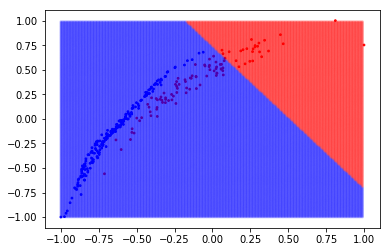

In [47]:
#L2 penalty, C=0.01 Figure 2.2
def plot(grid1,grid2,plotNum,fileName,plotType,model):
    
    fig = mp.figure()
    if(plotType==pred):
        if(plotNum==1):
            ax = fig.add_subplot(grid1,grid2,plotNum)
            ax.scatter(Xnorm, Ynorm, c=colors, s=3)
            ax.scatter(xPred, yPred, s=3, c=plotType(model),alpha=.2)
            mp.savefig('fileName', dpi = 300)
            show()
        else:
            ax = []
            

    
fig = mp.figure()
ax = fig.add_subplot(111)
ax.scatter(Xnorm, Ynorm, c=colors, s=3)
ax.scatter(xPred, yPred, s=3, c=pred(lr_c1_l2),alpha=.2)
mp.savefig('Figure2_2.png', dpi = 300)
show()


mp.subplot(2,2,1)
mp.errorbar(c, cv_err_2d_poly2[0], marker='s', yerr=cv_err_2d_poly2[1],fmt='o', 
            markersize=2, capsize=1.5, elinewidth=1) 
mp.title('Polynomial, degree=2')
mp.xscale('log')
mp.ylim(-0.1,0.4)
mp.xlabel('C')
mp.ylabel('CV_error')
mp.subplot(2,2,2)
mp.errorbar(c, cv_err_2d_poly5[0], marker='s', yerr=cv_err_2d_poly5[1],fmt='o', 
            markersize=2, capsize=1.5, elinewidth=1) 




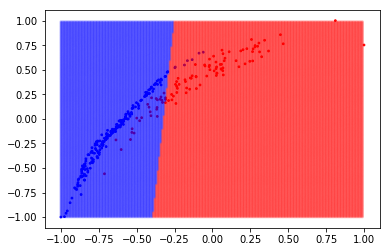

In [49]:
#L2 penalty, C=2 Figure 2.3
fig = mp.figure()
ax = fig.add_subplot(111)
ax.scatter(Xnorm, Ynorm, c=colors, s=3)
mp.scatter(xPred, yPred, s = 3, c = pred(lr_c2_l2),alpha = .2)
mp.savefig('Figure2_3.png', dpi = 300)
show() 

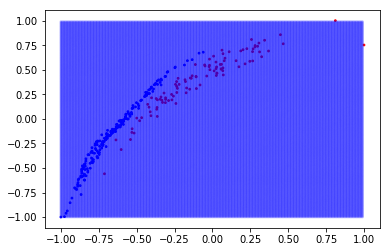

In [50]:
#L1 penalty, C=0.01
fig = mp.figure()
ax = fig.add_subplot(111)
ax.scatter(Xnorm, Ynorm, c=colors, s=3)
mp.scatter(xPred, yPred, s = 3, c = pred(lr_c1_l1),alpha = .2)
mp.savefig('Figure2_2_L1.png', dpi = 300)
show() 

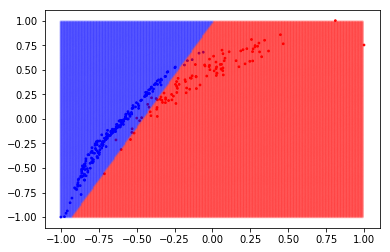

In [51]:
#L1 penalty, C=2
fig = mp.figure()
ax = fig.add_subplot(111)
ax.scatter(Xnorm, Ynorm, c=colors, s=3)
mp.scatter(xPred, yPred, s = 3, c = pred(lr_c2_l1),alpha = .2)
mp.savefig('Figure2_3_L1.png', dpi = 300)
show() 

## 3 Support Vector Machines


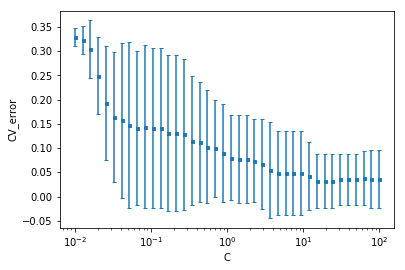

In [12]:
#2d space Figure 2.4 
c = np.logspace(-2,2,num=40,endpoint=True)
def cv_err(kernel, degree, gamma, data, label):
    err_bar = []
    err_mean = []
    for index in range(40):
        svc = SVC(kernel = kernel, degree = degree, gamma = gamma, C = c[index])
        acc = cross_val_score(svc, data, label, cv=10)
        err = 1 - acc
        err_mean.append(err.mean())
        err_bar.append(1.96 * err.std())
    return [err_mean,err_bar];

cv_err_2d_linear = cv_err('linear',0, 'auto', simpleTrain,trainDigits)
mp.errorbar(c, cv_err_2d_linear[0], marker='s', yerr=cv_err_2d_linear[1],fmt='o', 
            markersize=3, capsize=2, elinewidth=1.5) 
mp.xscale('log')
mp.xlabel('C')
mp.ylabel('CV_error')
mp.savefig('Figure2_4.png', dpi = 300)
show()

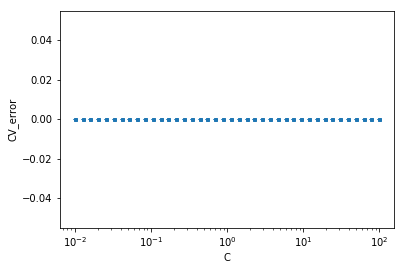

In [13]:
#256 space Figure 2.5 
cv_err_256d_linear = cv_err('linear',0,'auto',np.asarray(trainFeatures),trainDigits)
mp.errorbar(c, cv_err_256d_linear[0], marker='s', yerr=cv_err_256d_linear[1],fmt='o', 
            markersize=c3, capsize=2, elinewidth=1.5) 
mp.xscale('log')
mp.xlabel('C')
mp.ylabel('CV_error')
mp.savefig('Figure2_5.png', dpi = 300)
show()

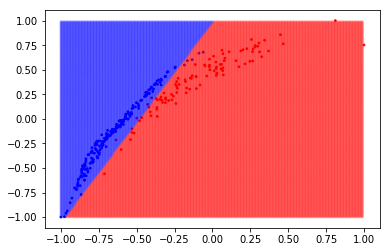

0.967948717948718

In [52]:
#2D space with optimal C  Figure 2.6
def c_opt(cv):
    upper_bound = np.asarray(cv[0])+np.asarray(cv[1])
    min_upper_bound = np.min(upper_bound)
    indx = np.argmin(upper_bound)
    return c[indx];

c_opt(cv_err_2d_linear)  #30.702906297578497
#SVM with optimal C  linear Figure 2.6
svm_opt = SVC(kernel = 'linear', C = c_opt(cv_err_2d_linear))
svm_opt_fit = svm_opt.fit(simpleTrain, trainDigits)
fig = mp.figure()
ax = fig.add_subplot(111)
ax.scatter(Xnorm, Ynorm, c=colors, s=3)
mp.scatter(xPred, yPred, s = 3, c = pred(svm_opt_fit),alpha = .2)
mp.savefig('Figure2_6.png', dpi = 300)
show() 
accuracy(svm_opt_fit)  #0.967948717948718

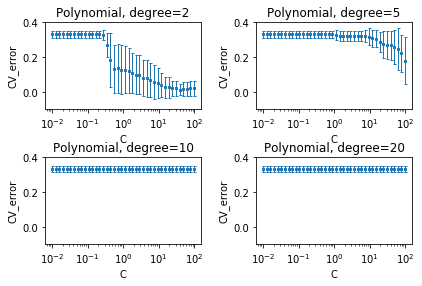

In [46]:
#polynomial kernel  2D
cv_err_2d_poly2 = cv_err('poly', 2, 'auto', simpleTrain, trainDigits)
cv_err_2d_poly5 = cv_err('poly', 5, 'auto', simpleTrain, trainDigits)
cv_err_2d_poly10 = cv_err('poly', 10, 'auto', simpleTrain, trainDigits)
cv_err_2d_poly20 = cv_err('poly', 20, 'auto', simpleTrain, trainDigits)
c_opt_2d_poly2 = c_opt(cv_err_2d_poly2) 
c_opt_2d_poly5 = c_opt(cv_err_2d_poly5)
c_opt_2d_poly10 = c_opt(cv_err_2d_poly10)
c_opt_2d_poly20 = c_opt(cv_err_2d_poly20)
c_opt_2d_poly2, c_opt_2d_poly5, c_opt_2d_poly10, c_opt_2d_poly20  
#(38.88155180308085, 100.0, 0.01, 0.01)

mp.subplot(2,2,1)
mp.errorbar(c, cv_err_2d_poly2[0], marker='s', yerr=cv_err_2d_poly2[1],fmt='o', 
            markersize=2, capsize=1.5, elinewidth=1) 
mp.title('Polynomial, degree=2')
mp.xscale('log')
mp.ylim(-0.1,0.4)
mp.xlabel('C')
mp.ylabel('CV_error')
mp.subplot(2,2,2)
mp.errorbar(c, cv_err_2d_poly5[0], marker='s', yerr=cv_err_2d_poly5[1],fmt='o', 
            markersize=2, capsize=1.5, elinewidth=1) 
mp.title('Polynomial, degree=5')
mp.xscale('log')
mp.ylim(-0.1,0.4)
mp.xlabel('C')
mp.ylabel('CV_error')
mp.subplot(2,2,3)
mp.errorbar(c, cv_err_2d_poly10[0], marker='s', yerr=cv_err_2d_poly10[1],fmt='o', 
            markersize=2, capsize=1.5, elinewidth=1) 
mp.title('Polynomial, degree=10')
mp.xscale('log')
mp.ylim(-0.1,0.4)
mp.xlabel('C')
mp.ylabel('CV_error')
mp.subplot(2,2,4)
mp.errorbar(c, cv_err_2d_poly20[0], marker='s', yerr=cv_err_2d_poly20[1],fmt='o', 
            markersize=2, capsize=1.5, elinewidth=1) 
mp.title('Polynomial, degree=20')
mp.xscale('log')
mp.ylim(-0.1,0.4)
mp.xlabel('C')
mp.ylabel('CV_error')
mp.subplots_adjust(top=0.92, bottom=0.15, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
mp.savefig('Figure2_7.png', dpi = 300)
show()

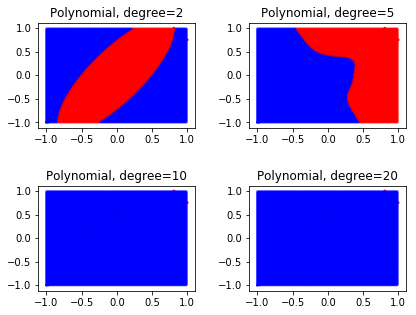

In [54]:
svm_opt_2d_poly2 = SVC(kernel='poly',degree=2,C=c_opt_2d_poly2,gamma='auto').fit(simpleTrain, trainDigits)
svm_opt_2d_poly5 = SVC(kernel='poly',degree=5,C=c_opt_2d_poly5,gamma='auto').fit(simpleTrain, trainDigits)
svm_opt_2d_poly10 = SVC(kernel='poly',degree=10,C=c_opt_2d_poly10,gamma='auto').fit(simpleTrain, trainDigits)
svm_opt_2d_poly20 = SVC(kernel='poly',degree=20,C=c_opt_2d_poly20,gamma='auto').fit(simpleTrain, trainDigits)
#decision boundary for various polynomial degrees at their optimal C's 

fig = mp.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(Xnorm, Ynorm, c=colors, s=3)
ax1.scatter(xPred, yPred, s = 3, c = pred(svm_opt_2d_poly2), alpha = .2)
mp.title('Polynomial, degree=2')
ax2 = fig.add_subplot(2,2,2)
ax2.scatter(Xnorm, Ynorm, c=colors, s=3)
ax2.scatter(xPred, yPred, s = 3, c = pred(svm_opt_2d_poly5), alpha = .2)
mp.title('Polynomial, degree=5')
ax3 = fig.add_subplot(2,2,3)
ax3.scatter(Xnorm, Ynorm, c=colors, s=3)
ax3.scatter(xPred, yPred, s = 3, c = pred(svm_opt_2d_poly10), alpha = .2)
mp.title('Polynomial, degree=10')
ax4 = fig.add_subplot(2,2,4)
ax4.scatter(Xnorm, Ynorm, c=colors, s=3)
ax4.scatter(xPred, yPred, s = 3, c = pred(svm_opt_2d_poly20), alpha = .2)
mp.title('Polynomial, degree=20')
mp.subplots_adjust(top=0.98, bottom=0.05, left=0.10, right=0.95, hspace=0.55,
                    wspace=0.35)
mp.savefig('Figure2_8.png', dpi = 300)
show()

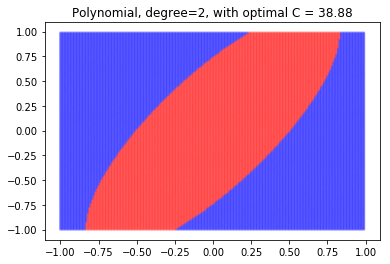

In [19]:
def min_upper(degree):
    upper_bound_degree = np.asarray(degree[0])+np.asarray(degree[1])
    min_upper = np.min(upper_bound_degree)
    return min_upper;
[min_upper(cv_err_2d_poly2), min_upper(cv_err_2d_poly5), 
 min_upper(cv_err_2d_poly10), min_upper(cv_err_2d_poly20)] 
#degree 2 and c=c_opt_2d_poly2
mp.scatter(xPred, yPred, s = 3, c = pred(svm_opt_2d_poly2), alpha = .2)
mp.title('Polynomial, degree=2, with optimal C = 38.88')
mp.savefig('Figure2_9.png', dpi = 300)
show()

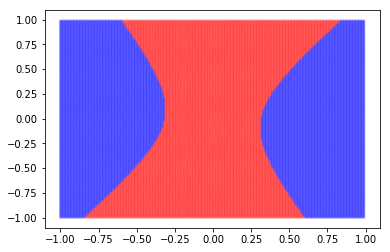

In [27]:
##Overfitting vs. Underfitting 

over_model = SVC(kernel='poly',degree=2,C=0.8,gamma='auto').fit(simpleTrain,trainDigits)
mp.scatter(xPred, yPred, s = 3, c = pred(over_model), alpha = .2)
show()

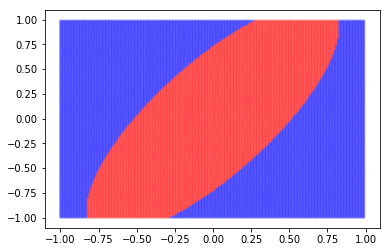

In [26]:
under_model = SVC(kernel='poly',degree=2,C=100,gamma='auto').fit(simpleTrain,trainDigits)
mp.scatter(xPred, yPred, s = 3, c = pred(under_model), alpha = .2)
show()

In [ ]:
#Extra Credit 
